# Which games will succeed?
Online video game store Ice is looking to identify patterns that determine whether a game sccueeds or not in order to spot potential big winners and plan advertising campaigns. We are provided with 2016 data and current date is Dec of 2016. 

## Open and import

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import linregress
import math
import plotly.express as px
import seaborn as sns

### Load and review data

In [2]:
# Import data
df = pd.read_csv('dataset/moved_games.csv')

In [3]:
# Let's see first 5 rows
display(df.head(5))

# View data information
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info"> Observation:
<li> We see that column names include upper and lower case. In order to make them more uniform, let's make them all into lower case.</li>
<li> User_Score is numeric value but it's showing as object/string value. Let's change this to numeric data type.
    <ul>
        <li>User_Score column also includes 'tbd'(to be deteremined) as value. This will be replaced with 999 since the score is out of 10 and there is no value lower than 0 and higher than 10.  </ul>
  </li>
<li> Critic_Score, User_Score, and Rating have missing values. However, we can't determine if filling them in at this point will be valuable or cause more issue (e.g. Critic_Score and User_Score are numeric and true value may be mixed if we fill it in with numeric value and if we fill it in with non-numeric value, using them to calculate may be hard)</li>

## Prepare Data and Calculate the total sales

### Change column names

In [4]:
# Make all column names in lower case
df.columns = df.columns.str.lower()

# Check results to confirm
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Replace TBD and change data type of user_score column

In [5]:
# Replacce 'tbd' with blank
df['user_score'] = df['user_score'].replace('tbd', '')

In [6]:
# change data type of user_score to float where possible 
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')
print(df['user_score'].dtype)

float64


### Check for duplicate columns 

In [7]:
# Check for duplicates
duplicates = df[df.duplicated()].count()
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()
df.info()

display(df.head(5))

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Calculate the total sales (all regions) for each game and save them

In [8]:
df['total_sales'] = df[['na_sales', 'eu_sales',
                        'jp_sales', 'other_sales']].sum(axis=1)
display(df.head(5))
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


<div class="alert alert-info"> <b>Mid-point check:</b>
    <li> We have imported libraries necessary for analysis.</li>
    <li> We have imported the data file and reviewed it. </li>
    <li> We didn't find any duplicates in the data. </li>
    <li> We have corrected column names to only include lower cases. </li>
    <li> We have added a total_sales column. </li>
Next, we'll analyze the data further on Yearly Releases, Sales vs Platform, Regional Differences, and Hypothesis Testing.

## 3. Analyze the Data

### How many games were released in differen years?

In [9]:
# Group the data by year_released and count the number of games released
yrly_game_count = df.groupby('year_of_release').agg({'name': 'count'})

# Change the column names
yrly_game_count = yrly_game_count.rename(columns={'name': '#_games_sold'})
yrly_game_count = yrly_game_count.rename_axis('year').reset_index()

# Change the column Dtype of year
yrly_game_count['year'] = yrly_game_count['year'].astype(int)

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


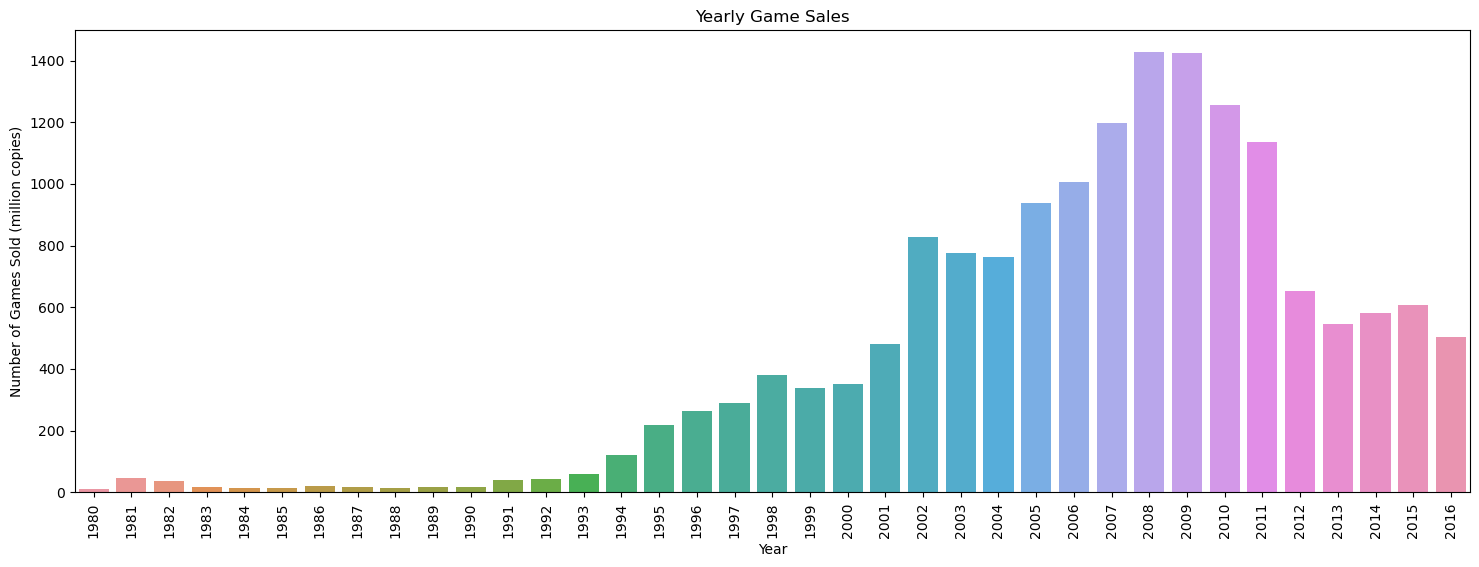

In [10]:
# Let's visualize the number of games released in each year

plt.figure(figsize=(18,6))
sns.barplot(data=yrly_game_count,x='year',y='#_games_sold')
plt.title('Yearly Game Sales')
plt.ylabel('Number of Games Sold (million copies)')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.show()

<div class="alert alert-info"> Observation:
<li> We see that number of games sales increased since 1980 to 2008.</li>
    <li> Beginning 2009, game sales has decreased and it's starting to show plateau since 2013. </li>
    <li> We can also observe spike of growth in number of games sales between 2000 and 2008</li>

### Sales vs Platform

#### Top 10 platform by sales and year-year performance

In [11]:
# Group the data by 'platform' and calculate the total sales
plat_sales = df.groupby(['platform'])['total_sales'].sum().reset_index()

# Sort the top10_plat and find the top 10 platform by sales
top10_plat = plat_sales.sort_values(by='total_sales', ascending=False).head(10)
display(top10_plat)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


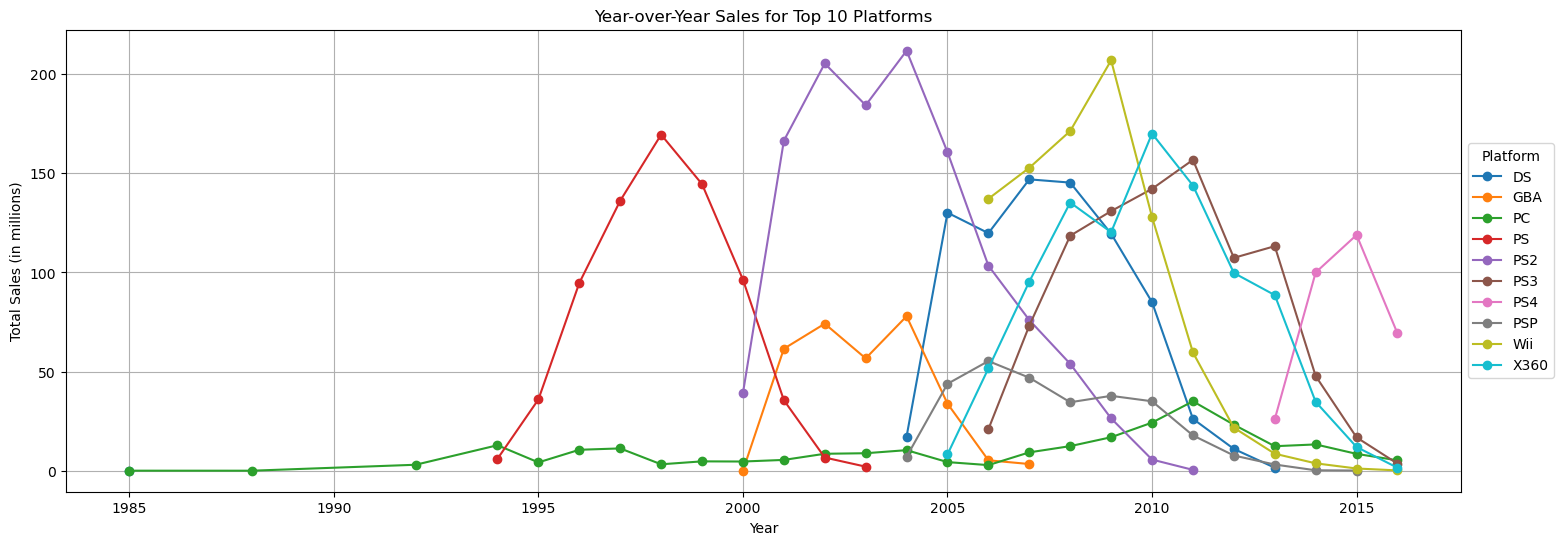

In [12]:
# Filter the 'df' DataFrame to include only data for the top 10 platforms
df_plat10 = df[df['platform'].isin(top10_plat['platform'])]

# Group the filtered data by 'year_of_release' and 'platform' and calculate the total sales
plat_year_sales = df_plat10.groupby(['year_of_release', 'platform'])[
    'total_sales'].sum().unstack()

# Create a line plot to visualize year-over-year sales for the top 10 platforms
plt.figure(figsize=(18, 6))
plat_year_sales.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Year-over-Year Sales for Top 10 Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.show()

In [13]:
display(plat_year_sales.head())

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985.0,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992.0,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
plat_year_sales_2013_2016 = plat_year_sales[plat_year_sales.index >= 2013]
display(plat_year_sales_2013_2016.head())
display(plat_year_sales_2013_2016.describe())

total_sales_past_4_years = plat_year_sales_2013_2016.sum()
total_sales_past_4_years = total_sales_past_4_years.sort_values(
    ascending=False)
display(total_sales_past_4_years)

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
2013.0,1.54,NaN,12.38,NaN,NaN,113.25,25.99,3.14,8.59,88.58
2014.0,NaN,NaN,13.28,NaN,NaN,47.76,100.00,0.24,3.75,34.74
2015.0,NaN,NaN,8.52,NaN,NaN,16.82,118.90,0.12,1.14,11.96
2016.0,NaN,NaN,5.25,NaN,NaN,3.60,69.25,NaN,0.18,1.52


platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
count,1.00,0.0,4.000000,0.0,0.0,4.000000,4.000000,3.000000,4.000000,4.000000
mean,1.54,NaN,9.857500,NaN,NaN,45.357500,78.535000,1.166667,3.415000,34.200000
std,NaN,NaN,3.701102,NaN,NaN,48.898675,40.567917,1.710010,3.765355,38.816131
min,1.54,NaN,5.250000,NaN,NaN,3.600000,25.990000,0.120000,0.180000,1.520000
25%,1.54,NaN,7.702500,NaN,NaN,13.515000,58.435000,0.180000,0.900000,9.350000
50%,1.54,NaN,10.450000,NaN,NaN,32.290000,84.625000,0.240000,2.445000,23.350000
75%,1.54,NaN,12.605000,NaN,NaN,64.132500,104.725000,1.690000,4.960000,48.200000
max,1.54,NaN,13.280000,NaN,NaN,113.250000,118.900000,3.140000,8.590000,88.580000


platform
PS4     314.14
PS3     181.43
X360    136.80
PC       39.43
Wii      13.66
PSP       3.50
DS        1.54
GBA       0.00
PS        0.00
PS2       0.00
dtype: float64

<div class="alert alert-info"> Observation:
    <li> Typical lifespand of a platform is 10 years </li>
    <li> Top 10 performers in the past 10 years are: PS4, PS3, X360, PC, Wii, PSP, DS, GBA, PS, and PS2. </li>
    <li> PS, PS2, GBA are all platform that were developed prior to 2010. These are also popular gaming platform prior to 2010, but since 2010 they are recording less than 6 million/year in sales.
        <ul>
            <li> There aren't any sales of GBA or PS games in the last 4 years.</li>
            <li> There aren't any sales of PS2 games in the past 3 years.</li> 
            <li> DS is also showing no sale in past 2 years. </li>
        </ul>
    </li>
    <li> In the past 4 years between 2013 - 2016:
        <ul>
            <li>Top 3 profitable platforms are: PS4 (314 million), PS3 (181 million), and X360 (136 million) between 2013 - 2016. </li>
            <li> Sales of PS3 and X360 has been decreasing since release of PS4. </li>
            <li> PC, Wii, PSP and DS had some sales in the past 4 years but has been consistnly decreasing. Their combined sales is less than 60 million between 2013 - 2016. 
        </ul>
    </li>
    <li> Based on the previous years sales, in 2017 we anticipate:
        <ul>
            <li> PS4 to have highest sales among the 10 platforms we have reveiwed </li>
            <li> PS3 and X360 to hold its top 2 position in sales among the 10 platforms we have reviewed, but further decrease in sales.</li></ul></li>
                
Please note 2016 is included in the study, but is incomplete.

#### Global Sales of all games by platform
Let's look at Global Sales of all games broken down by platform and a closer look at Top 5 performer in the past 4 years.

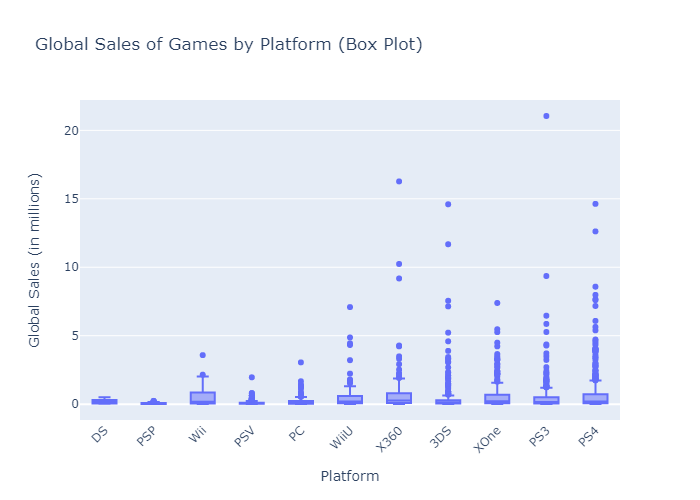

In [15]:
# Filter to only include 2013 - 2016
fouryr = df[df['year_of_release'] >= 2013]

GSales_plat = px.box(fouryr, x='platform', y='total_sales', labels={'platform': 'Platform', 'total_sales': 'Global Sales (in millions)'},
                     title='Global Sales of Games by Platform (Box Plot)')
GSales_plat.update_xaxes(categoryorder='total ascending')
GSales_plat.update_layout(xaxis_tickangle=-45)

GSales_plat.show("png", engine="kaleido")

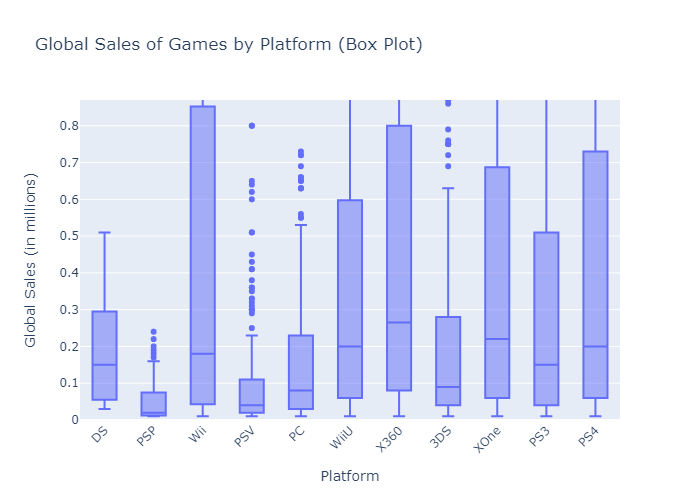

In [16]:
# Let's graph it without outliers
GSales_plat = px.box(fouryr, x='platform', y='total_sales', labels={'platform': 'Platform', 'total_sales': 'Global Sales (in millions)'},
                     title='Global Sales of Games by Platform (Box Plot)')
GSales_plat.update_xaxes(categoryorder='total ascending')
GSales_plat.update_layout(xaxis_tickangle=-45)
GSales_plat.update_yaxes(range=[0, 0.87])

GSales_plat.show("png", engine="kaleido")

In [17]:
# Let's make a pivot of all platform to see their sales statistics
pivot_df = fouryr.pivot(columns='platform', values='total_sales')
pivot_df.reset_index(drop=True, inplace=True)
display(pivot_df.describe())

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,8.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.192500,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.172026,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


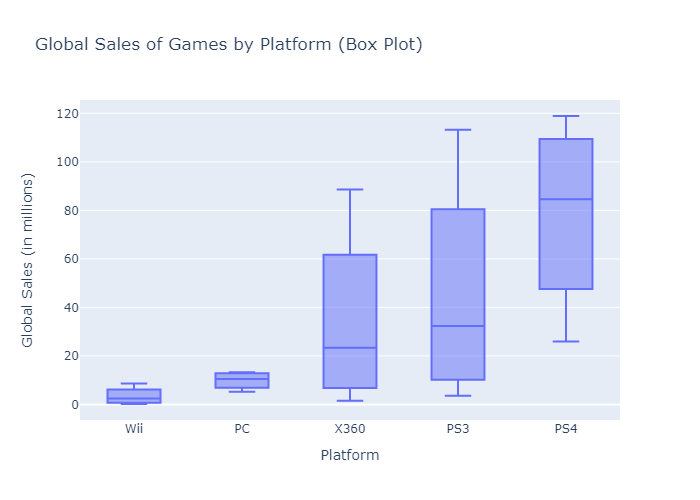

In [18]:
# Let's filter plat_year_slaes_2013_2016 further to only include top 5 performers
top5plat = ['PS4', 'PS3', 'X360', 'PC', 'Wii']
top_5_4yr = plat_year_sales_2013_2016[top5plat]

# Let's visualize the Global Sales of the top 5 platforms
GSales_plat = px.box(top_5_4yr, labels={'platform': 'Platform', 'value': 'Global Sales (in millions)'},
                     title='Global Sales of Games by Platform (Box Plot)')
GSales_plat.update_xaxes(categoryorder='total ascending')

GSales_plat.show("png", engine="kaleido")

In [19]:
# Let's take a look at Top 5 performer in the past 4 years to see their sales statistics
display(top_5_4yr)
display(top_5_4yr.describe())

platform,PS4,PS3,X360,PC,Wii
year_of_release,,,,,
2013.0,25.99,113.25,88.58,12.38,8.59
2014.0,100.00,47.76,34.74,13.28,3.75
2015.0,118.90,16.82,11.96,8.52,1.14
2016.0,69.25,3.60,1.52,5.25,0.18


platform,PS4,PS3,X360,PC,Wii
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,78.535000,45.357500,34.200000,9.857500,3.415000
std,40.567917,48.898675,38.816131,3.701102,3.765355
min,25.990000,3.600000,1.520000,5.250000,0.180000
25%,58.435000,13.515000,9.350000,7.702500,0.900000
50%,84.625000,32.290000,23.350000,10.450000,2.445000
75%,104.725000,64.132500,48.200000,12.605000,4.960000
max,118.900000,113.250000,88.580000,13.280000,8.590000


<div class="alert alert-info"> Observation: 
    <li> Global Sales by Platform in the last 4 years:
        <ul>
            <li> Minimum global sales between platforms range from 0.01 - 0.03 million.</li>
            <li> Maximum global sales between platforms range from 0.51 - 16.27 million. </li>
            <li> Average global sales between platforms range from 0.05 - 0.74 million. </li>
            <li> Median global sales between platforms range from 0.02 - 0.22 million.<li>
            <li> Although maximum range of sales between all platforms are significant at ~ 15 million dollars, minimum, average, and median global sales between platforms are less than 1 million dollars.</li> 
        </ul>
    </li>
    <li> Top 5 platform (PS4, PS3, X360, Wii) in last 4 years:
        <ul>
            <li> Minimum sales of the top 5 platform in past 4 years range from 0.18 - 25.99 million. </li>
            <li> Maximum sales of the top 5 platform in past 4 years range from 8.59 - 188.9  million </li>
            <li> Average sales of the top 5 platform in past 4 years range from 3.42 - 78.54 million. </li>
            <li> Median sales of the top 5 platform in past 4 years range from 2.45 - 84.63 million. </li>
            <li> Yearly Sales of PS4 has been steadily increased since its release of 2013. 2016 is incomplete data so we can't determine if its sales actually decreased in 2016. </li>
            <li> Yearly Sales of PS3, X360, and Wii have been decreasing steadily since 2013. </li>
        </ul>
    </li>

#### Reviews and Sales
Let's take a look and compare Wii's performance compared to Top 3 Platform in the past 4 years relative to critic and user score.

In [20]:
# Let's create a dataframe that only include chosen platform and past 4 years
chosen_plat = ['PS4', 'PS3', 'X360', 'Wii']
chosen_plat_df = df[df['platform'].isin(chosen_plat)]
cplat_4yr = chosen_plat_df[chosen_plat_df.index >= 2013]
display(cplat_4yr.tail())
display(cplat_4yr.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16686,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.00,0.0,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
Index: 3622 entries, 2013 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3622 non-null   object 
 1   platform         3622 non-null   object 
 2   year_of_release  3540 non-null   float64
 3   genre            3622 non-null   object 
 4   na_sales         3622 non-null   float64
 5   eu_sales         3622 non-null   float64
 6   jp_sales         3622 non-null   float64
 7   other_sales      3622 non-null   float64
 8   critic_score     1978 non-null   float64
 9   user_score       2041 non-null   float64
 10  rating           2633 non-null   object 
 11  total_sales      3622 non-null   float64
dtypes: float64(8), object(4)
memory usage: 367.9+ KB


None

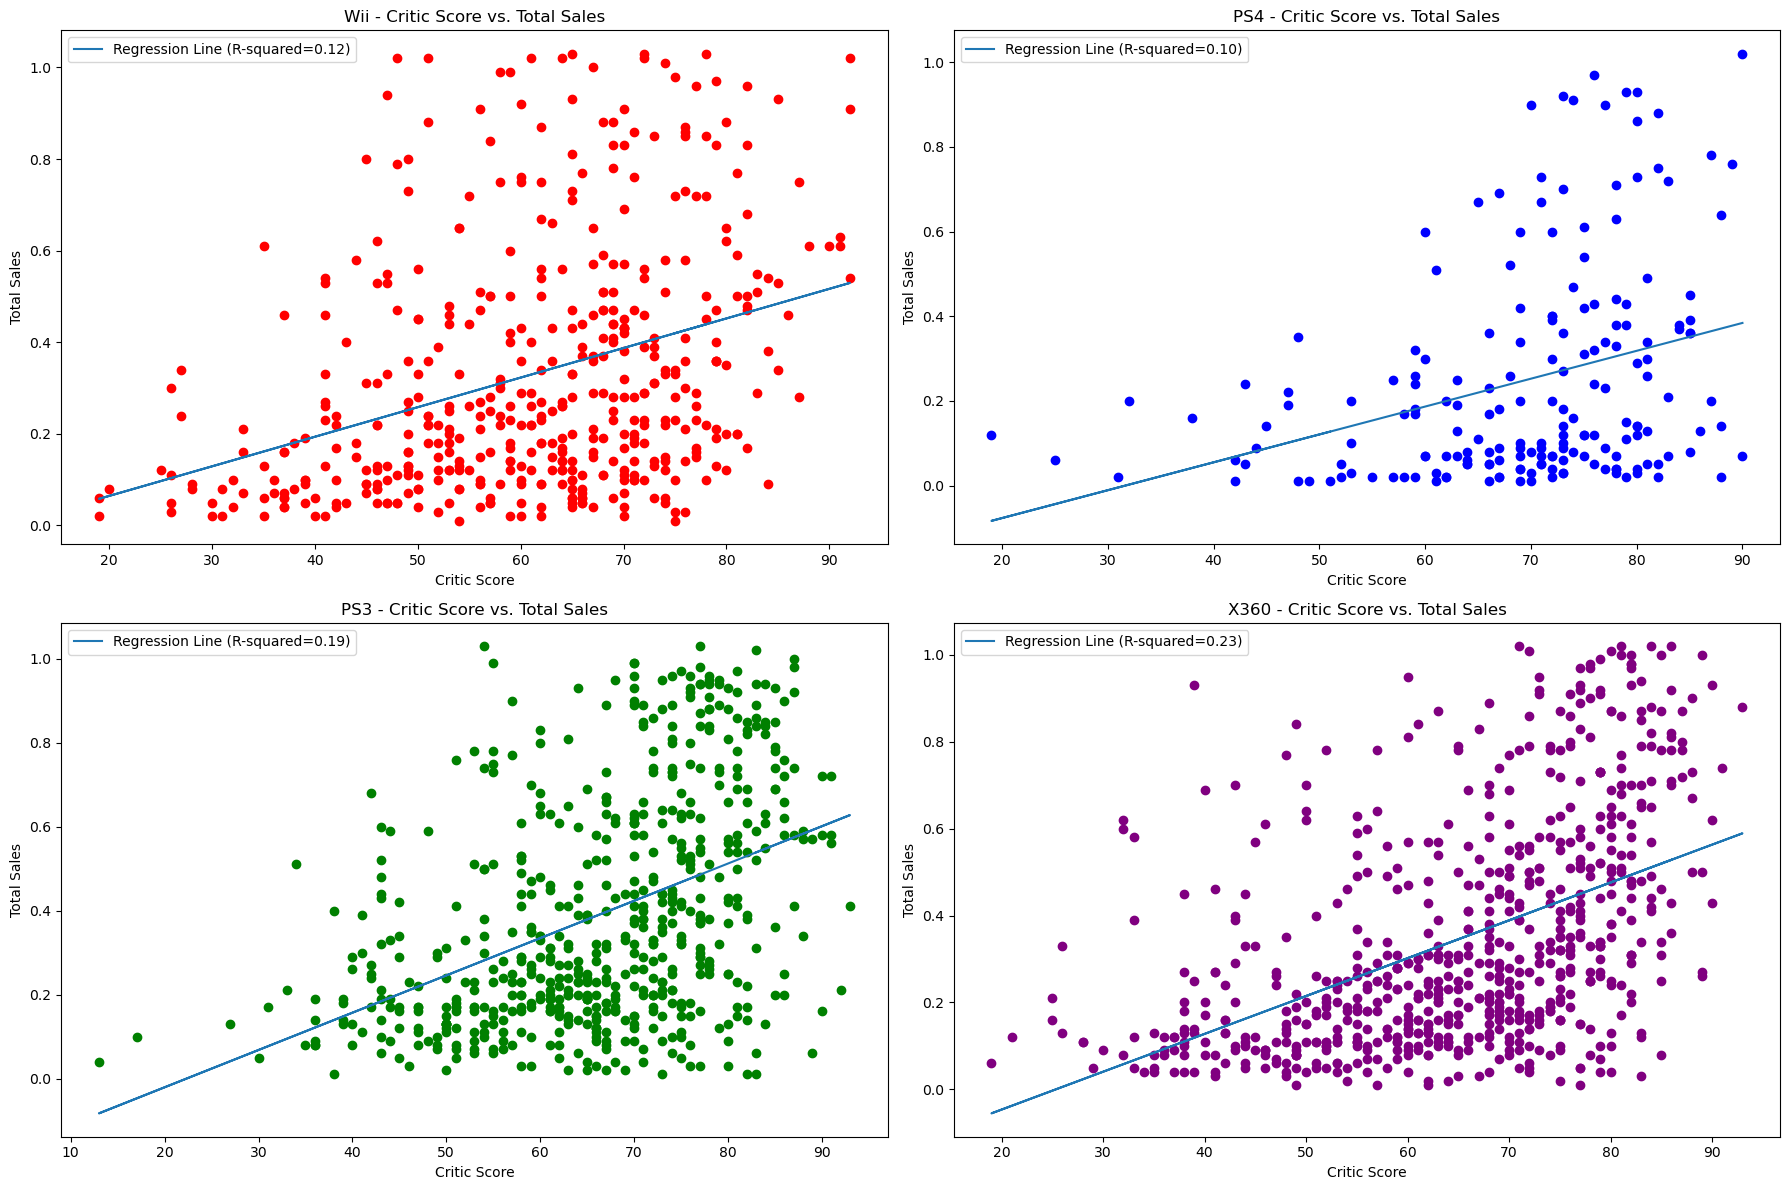

In [21]:
# Filter out the missing critic_score
cr_filtered = cplat_4yr.dropna(subset=['critic_score']).copy()

# Create a color mapping for each platform
color_mapping = {
    'Wii': 'red',
    'PS4': 'blue',
    'PS3': 'green',
    'X360': 'purple'
}

# Set the figure size
plt.figure(figsize=(18, 12))  # Increase the height to accommodate four plots

# Create separate scatter plots for each platform with linear regression lines
for i, (platform, color) in enumerate(color_mapping.items(), start=1):
    plt.subplot(2, 2, i)  # Create a subplot for each platform
    platform_critic = cr_filtered[cr_filtered['platform'] == platform]
    plt.scatter(platform_critic['critic_score'],
                platform_critic['total_sales'], c=color)
    plt.title(f'{platform} - Critic Score vs. Total Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales')

    # Calculate the linear regression line
    x = platform_critic['critic_score']
    y = platform_critic['total_sales']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    plt.plot(x, line, label=f'Regression Line (R-squared={r_value**2:.2f})')

    # Add a legend
    plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

In [22]:
# Calculate the Pearson correlation
crit_corr = cplat_4yr.groupby('platform')[
    ['critic_score', 'total_sales']].corr().iloc[0::2, -1].reset_index()

# Drop the 'level_1' column
crit_corr.drop(columns='level_1', inplace=True)

# Rename the columns for clarity
crit_corr.columns = ['platform', 'pearson_correlation']

# Display the correlation for each platform
display(crit_corr)

,platform,pearson_correlation
0,PS3,0.434063
1,PS4,0.323966
2,Wii,0.351032
3,X360,0.479694


<div class="alert alert-info"> Observation:
    <li> Both the Top 3 Platform and Wii demonstrated positive correlation between the Sales and Critic Score. Meaning as the Critic Score increases, sales also increased.</li>
    <li> At 0.48, X360 showed the strongest positive linear correlation between the Sales and the Critic Score.</li>
    <li> At 0.43, PS3 showed the next strongest positive linear correlation between the Sales and the Critic Scoe.</li>
    <li> At 0.35, Wii showed moderately positive linear correlation between the Sales and the Critic Score. </li>

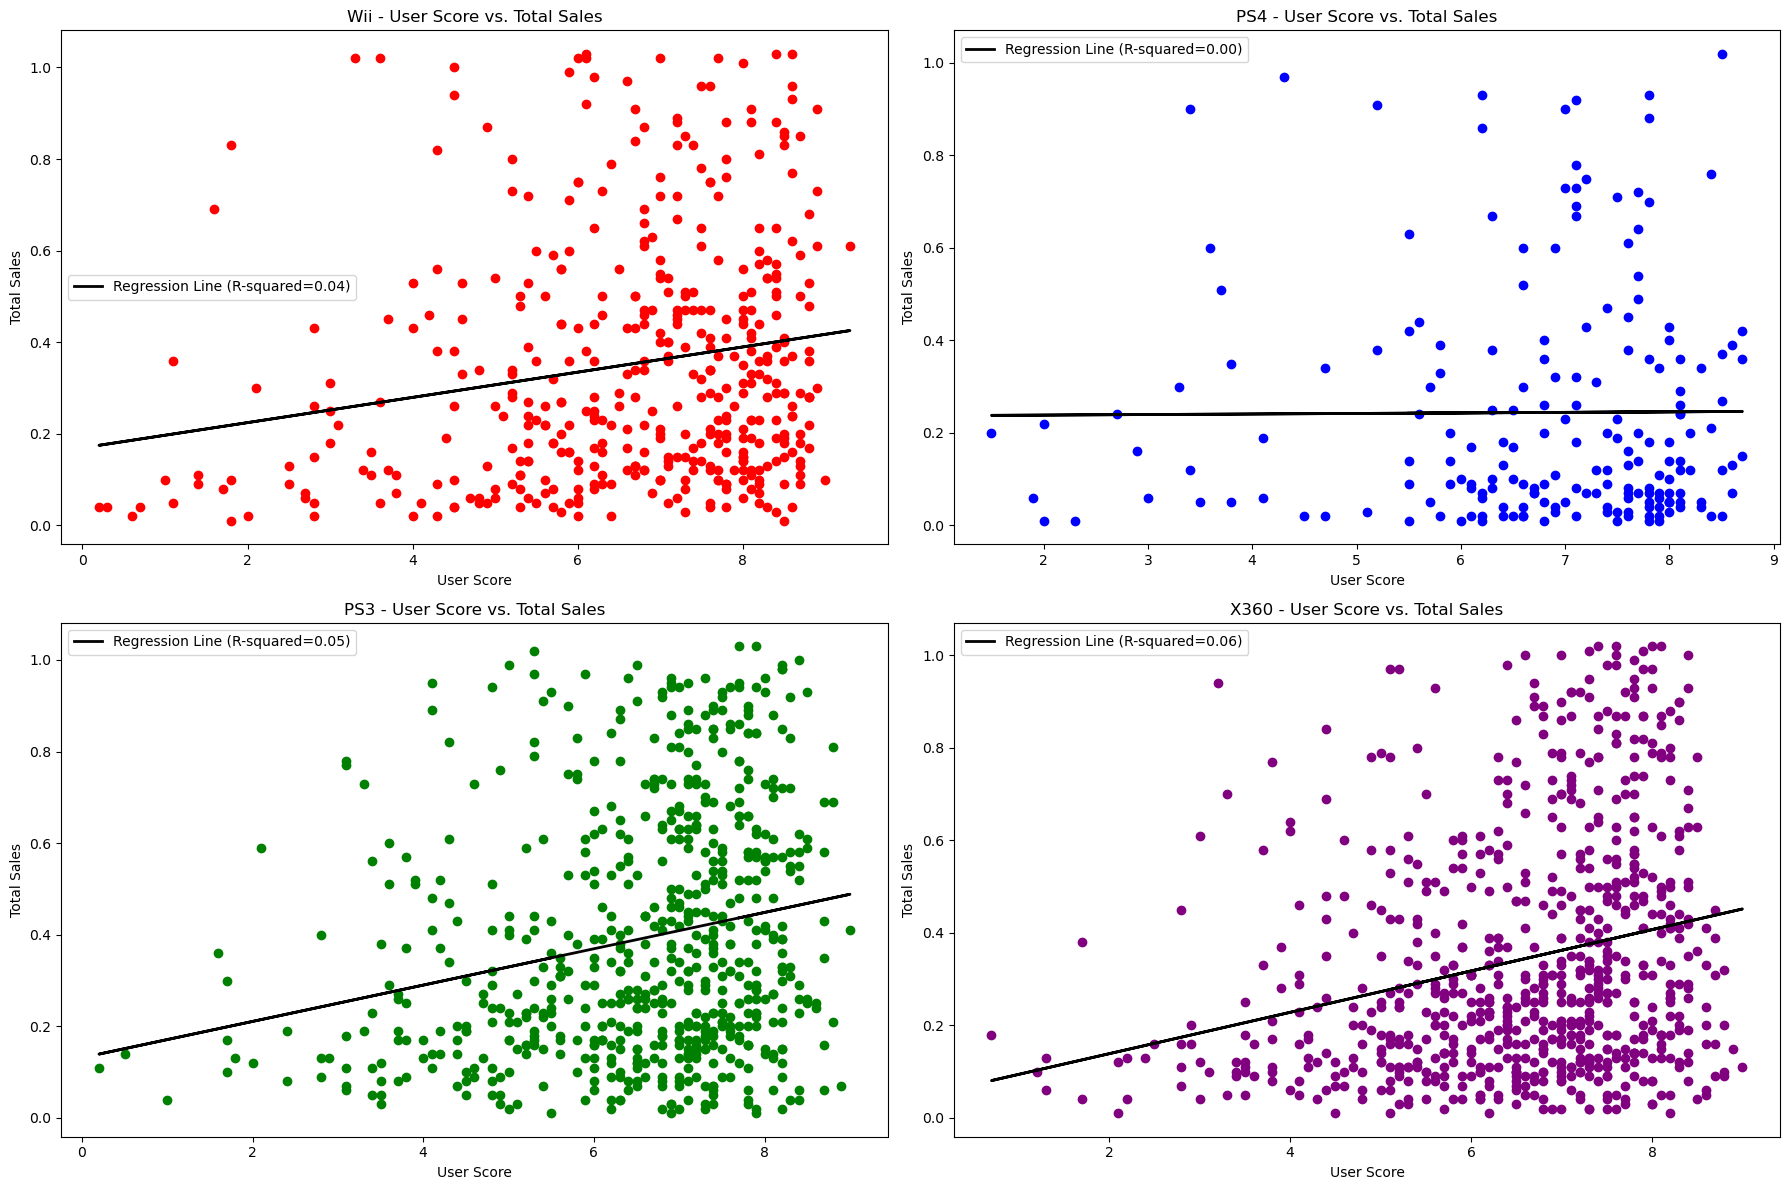

In [23]:
# Filter out the missing user_score
ur_filtered = cplat_4yr.dropna(subset=['user_score']).copy()

# Set the figure size
plt.figure(figsize=(18, 12))

# Create a scatter plot for each platform
for i, (platform, color) in enumerate(color_mapping.items(), start=1):
    plt.subplot(2, 2, i)  # Create a subplot for each platform
    platform_user = ur_filtered[ur_filtered['platform'] == platform]
    plt.scatter(platform_user['user_score'],
                platform_user['total_sales'], c=color)
    plt.title(f'{platform} - User Score vs. Total Sales')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales')

    # Calculate the linear regression line
    x = platform_user['user_score']
    y = platform_user['total_sales']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    plt.plot(x, line, color='black', linewidth=2,
             label=f'Regression Line (R-squared={r_value**2:.2f})')

    # Add a legend
    plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

In [24]:
# Calculate the Pearson correlation
user_corr = cplat_4yr.groupby(
    'platform')[['user_score', 'total_sales']].corr().iloc[0::2, -1].reset_index()

# Drop the 'level_1' column
user_corr.drop(columns='level_1', inplace=True)

# Rename the columns for clarity
user_corr.columns = ['platform', 'pearson_correlation']

# Display the correlation for each platform
display(user_corr)

,platform,pearson_correlation
0,PS3,0.219569
1,PS4,0.007039
2,Wii,0.187797
3,X360,0.248593


<div class="alert alert-info"> Observation:
    <li> Both the Top 3 Platform and Wii demonstrated positive correlation between the Sales and User Score. Meaning as the User Score increases, sales also increased. However, unlike the Critic Score correlations, the User Score correlation to sales is closer to 0 indicating weak correlation.</li>
    <li> At 0.25, X360 showed the strongest relation between the User Score and Sales compared to other platforms. However, 0.25 is still a relatively weak positive linear correlation.</li>
    <li> At 0.22, PS3 showed the next strongest relation between the User Score and the Sales compared to Wii and PS4. However, 0.22 is still a relatively weak positive linear correlation.
        <ul>
            <li> Wii correlation was even lower at 0.18 and PS4 correlation was neared 0 at 0.007</li>
        </ul>
    </li>

#### Same Game Sales Performance
In this section, we will look at how same games on Wii platform perform compared to other platforms in the past 4 years.

In [25]:
# Filter for games names released on wii
wii_games = fouryr[fouryr['platform'] == 'Wii']

# Group the data by game title and calculate the total sales for each game on all platforms
game_sales = fouryr.groupby(['name', 'platform'])['total_sales'].sum()

# Filter the game_sales DataFrame to include only rows where the game name is in wii_games
game_sales_wii_games = game_sales[game_sales.index.get_level_values(
    'name').isin(wii_games['name'])]

# Reset the index to obtain a DataFrame with columns
game_sales_wii_games = game_sales_wii_games.reset_index()

# Count the number of unique platforms for each game in game_sales_wii_games
platform_counts = game_sales_wii_games.groupby('name')['platform'].nunique()

# Filter game_sales_wii_games to include only games with platform counts greater than 1
common_games_wii_other = game_sales_wii_games[game_sales_wii_games['name'].isin(
    platform_counts[platform_counts > 1].index)]
display(common_games_wii_other.head(10))

,name,platform,total_sales
0,Angry Birds Star Wars,3DS,0.33
1,Angry Birds Star Wars,PS3,0.29
2,Angry Birds Star Wars,PS4,0.22
3,Angry Birds Star Wars,PSV,0.08
4,Angry Birds Star Wars,Wii,0.26
5,Angry Birds Star Wars,WiiU,0.10
6,Angry Birds Star Wars,X360,0.28
7,Angry Birds Star Wars,XOne,0.17
8,Barbie and Her Sisters Puppy Rescue,3DS,0.03
9,Barbie and Her Sisters Puppy Rescue,Wii,0.03


In [26]:
# Replace non-Wii platforms to other:
def replace_values(dataframe, column_name, specific_string, replacement_value):
    dataframe[column_name] = dataframe[column_name].apply(
        lambda x: replacement_value if x != specific_string else x)

replace_values(common_games_wii_other, 'platform', 'Wii', 'Other')

display(common_games_wii_other.head(10))

C:\Users\Tina\AppData\Local\Temp\ipykernel_18900\607951337.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,platform,total_sales
0,Angry Birds Star Wars,Other,0.33
1,Angry Birds Star Wars,Other,0.29
2,Angry Birds Star Wars,Other,0.22
3,Angry Birds Star Wars,Other,0.08
4,Angry Birds Star Wars,Wii,0.26
5,Angry Birds Star Wars,Other,0.10
6,Angry Birds Star Wars,Other,0.28
7,Angry Birds Star Wars,Other,0.17
8,Barbie and Her Sisters Puppy Rescue,Other,0.03
9,Barbie and Her Sisters Puppy Rescue,Wii,0.03


In [27]:
# Group the common_games_wii_other by platform and calculate avg_total_sales

avg_total_sales_wii_vs_other = common_games_wii_other.groupby(
    ['name', 'platform'])['total_sales'].mean().reset_index()
avg_total_sales_wii_vs_other.columns = ['name', 'platform', 'avg_total_sales']

display(avg_total_sales_wii_vs_other.tail(10))

,name,platform,avg_total_sales
34,The Croods: Prehistoric Party!,Other,0.043333
35,The Croods: Prehistoric Party!,Wii,0.060000
36,The Smurfs 2,Other,0.120000
37,The Smurfs 2,Wii,0.100000
38,Turbo: Super Stunt Squad,Other,0.016000
39,Turbo: Super Stunt Squad,Wii,0.010000
40,Young Justice: Legacy,Other,0.043333
41,Young Justice: Legacy,Wii,0.030000
42,Zumba Fitness: World Party,Other,0.240000
43,Zumba Fitness: World Party,Wii,0.230000


In [28]:
# Let's pivot the data
comparison_df = avg_total_sales_wii_vs_other.reset_index()
comparison_df = comparison_df.pivot(
    index='name', columns='platform', values='avg_total_sales')

# Reset the column names
comparison_df.columns.name = None
display(comparison_df.head(5))

,Other,Wii
name,,
Angry Birds Star Wars,0.210000,0.26
Barbie and Her Sisters Puppy Rescue,0.020000,0.03
Disney Infinity,0.662000,1.60
Disney Planes Fire & Rescue,0.060000,0.04
Disney's Planes,0.163333,0.14


,Other,Wii,Sales_Difference
name,,,
Just Dance 2014,0.564000,3.58,3.016000
Skylanders SWAP Force,0.641667,2.15,1.508333
Just Dance 2015,0.502000,2.01,1.508000
Disney Infinity,0.662000,1.60,0.938000
Just Dance 2016,0.350000,0.95,0.600000
Skylanders: Trap Team,0.558333,0.95,0.391667
Just Dance 2017,0.050000,0.18,0.130000
Angry Birds Star Wars,0.210000,0.26,0.050000
How to Train Your Dragon 2,0.152500,0.18,0.027500


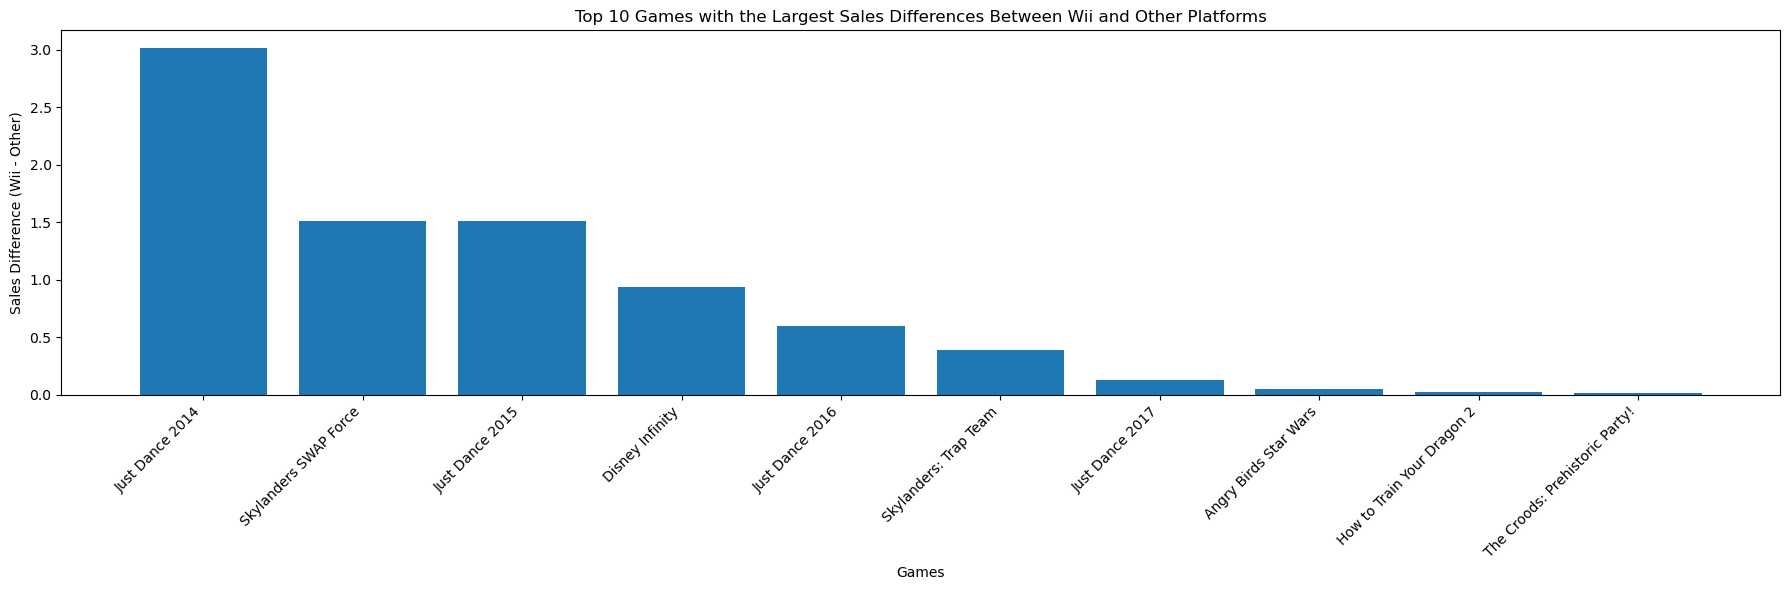

In [29]:
# Calculate the difference between 'Wii' and 'Other' sales for each game
comparison_df['Sales_Difference'] = comparison_df['Wii'] - \
    comparison_df['Other']

# Sort the DataFrame by the Sales_Difference column to identify the games with the largest differences
comparison_df_sorted = comparison_df.sort_values(
    by='Sales_Difference', ascending=False)

# Select the top 10 games with the largest differences for visualization
top_N = 10
top_N_df = comparison_df_sorted.head(top_N)
display(top_N_df)

# Create a bar chart to visualize the sales differences
plt.figure(figsize=(18, 6))
plt.bar(top_N_df.index, top_N_df['Sales_Difference'])

# Add labels and title
plt.xlabel('Games')
plt.ylabel('Sales Difference (Wii - Other)')
plt.title('Top 10 Games with the Largest Sales Differences Between Wii and Other Platforms'.format(top_N))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

<div class="alert alert-info"> Observation:
    <li> Above compares the games in both Wii platform and others between 2013 - 2016. It lists top 10 games with the largest sale difference.</li>
    <li> Wii platform did better than other gaming platforms' average_total_sale in all top 10 games.</li>

### Sales and Genre
Let's look further in to Sales and Genre in the past 4 years. 

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



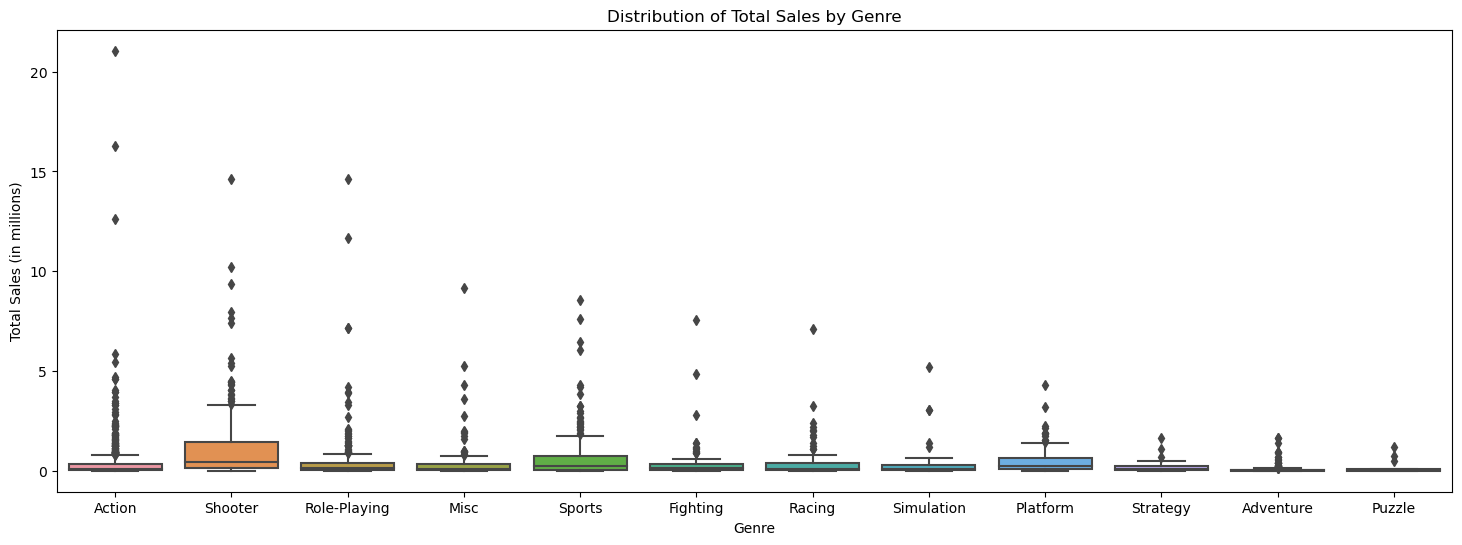

In [30]:
# Create a boxplot for the 'total_sales' column grouped by 'genre'
plt.figure(figsize=(18, 6))  # Set the figure size
sns.boxplot(x='genre', y='total_sales', data=fouryr)
plt.title('Distribution of Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')

# Show the plot
plt.show()

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



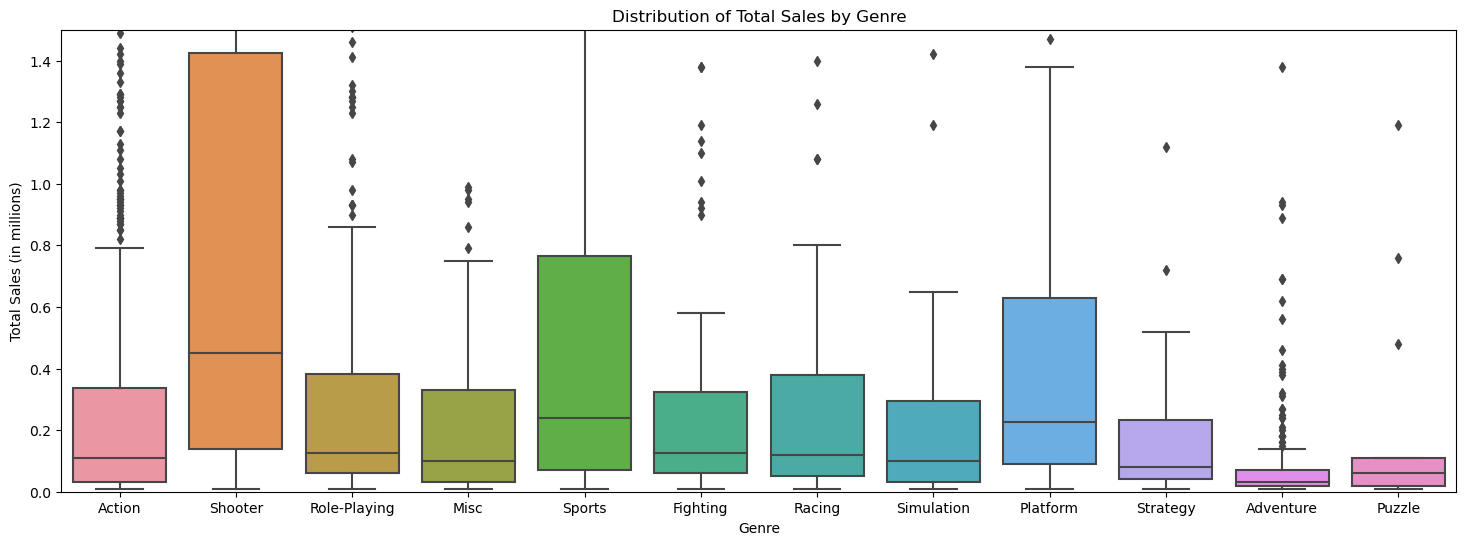

In [31]:
# Let's take a closer look at the boxes
plt.figure(figsize=(18, 6))
sns.boxplot(x='genre', y='total_sales', data=fouryr)
plt.title('Distribution of Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.ylim(0, 1.5)

# Show the plot
plt.show()

In [32]:
# Calculate the median for each genre

gby_genre = fouryr.groupby(['genre'])['total_sales'].mean().reset_index()
gby_genre.columns = ['genre', 'median_sales']
gby_genre = gby_genre.sort_values(by='median_sales', ascending=False)
display(gby_genre)

,genre,median_sales
8,Shooter,1.245882
10,Sports,0.703972
4,Platform,0.576081
7,Role-Playing,0.499623
6,Racing,0.469294
2,Fighting,0.441375
0,Action,0.420196
3,Misc,0.405290
9,Simulation,0.350968
5,Puzzle,0.186471


<div class="alert alert-info"> Observation:
    <li> Shooter, Sports, and Platform games are the steady sellers with highest median sales.</li>
    <li> Puzzle, Strategy, and Adventure genre games are the least profitable according to median sales.</li>
    <li> Most profitable games generally emulate human physics (e.g. Platform, Shooter)</li>
    <li> Less profitable games generally are analytical (e.g. Puzzle, Startegy)</li>

## Regional Differences
Let's take a look at how different regions' platform, game, and ESRB  vs sales were like in the past 4 years. 

### Top 5 Platform in each region

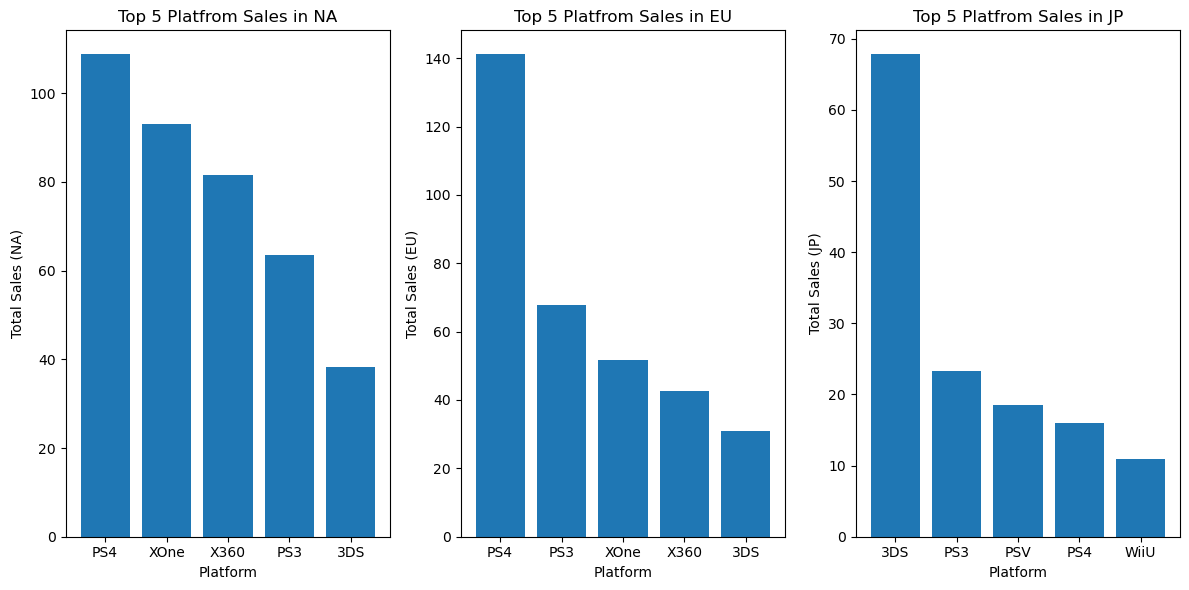

In [33]:
# Create DataFrames for each region with total sales
na_pf_sales = fouryr.groupby('platform')['na_sales'].sum().reset_index()
eu_pf_sales = fouryr.groupby('platform')['eu_sales'].sum().reset_index()
jp_pf_sales = fouryr.groupby('platform')['jp_sales'].sum().reset_index()

# Sort DataFrames in descending order of sales
na_pf_sales = na_pf_sales.sort_values(
    by='na_sales', ascending=False)
eu_pf_sales = eu_pf_sales.sort_values(
    by='eu_sales', ascending=False)
jp_pf_sales = jp_pf_sales.sort_values(
    by='jp_sales', ascending=False)

# Select the top 5 platform for each region
top_na_pf = na_pf_sales.head(5)
top_eu_pf = eu_pf_sales.head(5)
top_jp_pf = jp_pf_sales.head(5)

# Create bar plots for each region
plt.figure(figsize=(12, 6))

# NA Region
plt.subplot(131)
plt.bar(top_na_pf['platform'], top_na_pf['na_sales'])
plt.title('Top 5 Platfrom Sales in NA')
plt.xlabel('Platform')
plt.ylabel('Total Sales (NA)')

# EU Region
plt.subplot(132)
plt.bar(top_eu_pf['platform'], top_eu_pf['eu_sales'])
plt.title('Top 5 Platfrom Sales in EU')
plt.xlabel('Platform')
plt.ylabel('Total Sales (EU)')

# JP Region
plt.subplot(133)
plt.bar(top_jp_pf['platform'], top_jp_pf['jp_sales'])
plt.title('Top 5 Platfrom Sales in JP')
plt.xlabel('Platform')
plt.ylabel('Total Sales (JP)')

plt.tight_layout()
plt.show()

<div class="alert alert-info"> Observation:
    <li> NA and EU
        <ul>
            <li> Top 4 gaming platform in NA and EU are non-portable.</li>
            <li> 5th most popular platform in NA and EU is portable gaming platform. </li>
        </ul>
    </li>
    <li> JP
        <ul>
            <li> In JP region, there are 3 platform that are portable in their top 5 gaming platform.</li>
        </ul>
    </li>
    <li> In all 3 regions PS4, PS3, and 3DS were in top 5 gaming platform. </li> 

###  Top 5 Games in each region

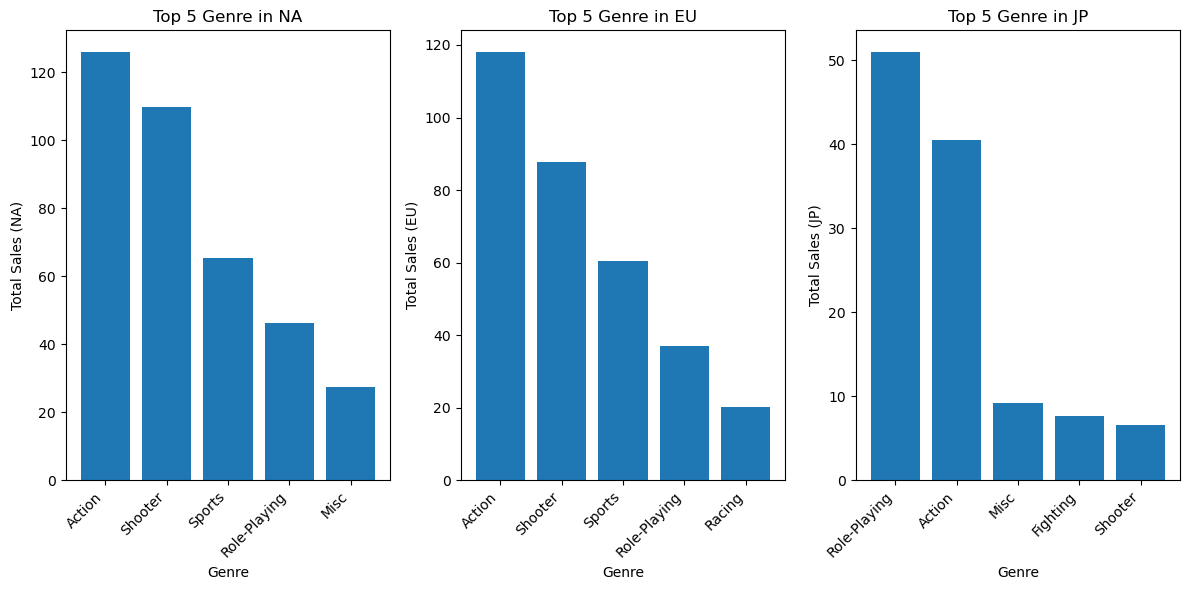

In [34]:
# Create DataFrames for each region with total sales
na_genre_sales = fouryr.groupby('genre')['na_sales'].sum().reset_index()
eu_genre_sales = fouryr.groupby('genre')['eu_sales'].sum().reset_index()
jp_genre_sales = fouryr.groupby('genre')['jp_sales'].sum().reset_index()

# Sort DataFrames in descending order of sales
na_genre_sales = na_genre_sales.sort_values(
    by='na_sales', ascending=False)
eu_genre_sales = eu_genre_sales.sort_values(
    by='eu_sales', ascending=False)
jp_genre_sales = jp_genre_sales.sort_values(
    by='jp_sales', ascending=False)

# Select the top 5 game for each region
top_na_genre = na_genre_sales.head(5)
top_eu_genre = eu_genre_sales.head(5)
top_jp_genre = jp_genre_sales.head(5)

# Create bar plots for each region
plt.figure(figsize=(12, 6))

# NA Region
plt.subplot(131)
plt.bar(top_na_genre['genre'], top_na_genre['na_sales'])
plt.title('Top 5 Genre in NA')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales (NA)')

# EU Region
plt.subplot(132)
plt.bar(top_eu_genre['genre'], top_eu_genre['eu_sales'])
plt.title('Top 5 Genre in EU')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales (EU)')

# JP Region
plt.subplot(133)
plt.bar(top_jp_genre['genre'], top_jp_genre['jp_sales'])
plt.title('Top 5 Genre in JP')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales (JP)')

plt.tight_layout()
plt.show()

<div class="alert alert-info"> Observation:
    <li> NA and EU
        <ul>
            <li> Top 4 gaming genre in NA and EU are same: Action, Shooter, Sports, and Role-Playing.</li>
        </ul>
    </li>
    <li> JP
        <ul>
            <li> Unlike NA and EU region, JP region includes Fighting in its top 5 genre (4th most popular) </li>
        </ul>
    </li>
    <li> EU
        <ul>
            <li> Unlike other regions, EU includes Racing in its top 5 genre (5th most popular) </li>
        </ul>
    </li>
    <li> All regions include Action, Shooter, Role-Playing in its top 5 genre </li>

### ESRB and Regional Sales

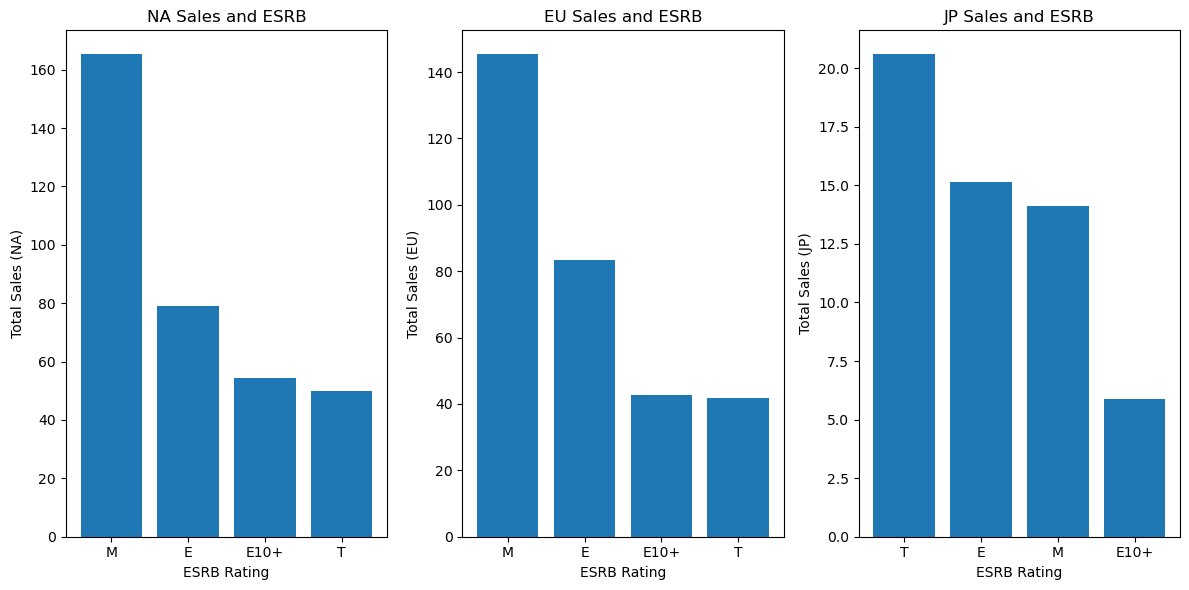

In [35]:
# Create DataFrames for each region with total sales
na_rating_sales = fouryr.groupby('rating')['na_sales'].sum().reset_index()
eu_rating_sales = fouryr.groupby('rating')['eu_sales'].sum().reset_index()
jp_rating_sales = fouryr.groupby('rating')['jp_sales'].sum().reset_index()

# Sort DataFrames in descending order of sales
na_rating_sales = na_rating_sales.sort_values(
    by='na_sales', ascending=False)
eu_rating_sales = eu_rating_sales.sort_values(
    by='eu_sales', ascending=False)
jp_rating_sales = jp_rating_sales.sort_values(
    by='jp_sales', ascending=False)

# Create bar plots for each region
plt.figure(figsize=(12, 6))

# NA Region
plt.subplot(131)
plt.bar(na_rating_sales['rating'], na_rating_sales['na_sales'])
plt.title('NA Sales and ESRB')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (NA)')

# EU Region
plt.subplot(132)
plt.bar(eu_rating_sales['rating'], eu_rating_sales['eu_sales'])
plt.title('EU Sales and ESRB')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (EU)')

# JP Region
plt.subplot(133)
plt.bar(jp_rating_sales['rating'], jp_rating_sales['jp_sales'])
plt.title('JP Sales and ESRB')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (JP)')

plt.tight_layout()
plt.show()

<div class="alert alert-info"> Observation:
    <li> NA and EU <ul> 
        <li> Top selling ESRB Rating is same between NA and EU region </li>
        <li> Although ESRB rating of E has the largest audience, it only ranked 2nd in both of the regions.</li>
        <li> Also, M has the smallest audience by age in our data, it ranked top 1 in both of the regions.</li></ul></li>
    <li> JP <ul>
        <li> In JP region, T which has the 3rd largest audience in our data ranked top 1.</li>
        <li> 2nd was E, and M was 3rd.</li>
        <li> Despite having second largest audience in our data, E10+ ranked 4th in JP region. </li></ul></li>

## Hypothesis Testing

### User Rating between Xbox One and PC

<div class="alert alert-info"> Setting up hypothesis:
    <li> Hypothesis is that Average user ratings of the Xbox One and PC platforms are the same. </li>
    <li> Since we are comparing two groups' average and there is no specific threshold we are testing, we will conduct the test with two-tail t test.</li>
    <li> Null hypothesis needs to be represented with =, so our null hypothesis(H0) in this case will be: Average user rating of the Xbox One and PC platforms are the same. Our alternative hypothesis(H1) will be: Average user rating of the Xbox One and PC platforms are not the same. </li> 
    <li> We will test the hypothesis with .05. 

In [36]:
# Let's filter out the NaN values in user_score
uscore_filtered = fouryr.dropna(subset=['user_score']).copy()

# User rating of Xbox One
xbox1_urating = uscore_filtered[uscore_filtered['platform']
                                == 'XOne']['user_score']

# User rating of PC
pc_urating = uscore_filtered[uscore_filtered['platform'] == 'PC']['user_score']

alpha = 0.05

pl_results = st.ttest_ind(pc_urating, xbox1_urating, equal_var=False)
print('p-value:', pl_results.pvalue)

if pl_results.pvalue < alpha:
    print("We reject the null hypothesis that the average user rating between Xbox One and PC are equal")
else:
    print("We accept the null hypothesis that the average user rating between Xbox One and PC are equal")

p-value: 0.14759594013430463
We accept the null hypothesis that the average user rating between Xbox One and PC are equal


<div class="alert alert-info"> Conclusion of the test:
    There is statistical evidence for us to conclude that the average user rating between Xbox One and PC are equal.

### User Rating between Action and Sports genre are different

<div class="alert alert-info"> Setting up hypothesis:
    <li> Hypothesis is that users' rating between Action and Sports genre are different. We can compare user's average score to test this. </li>
    <li> Since we are comparing two groups' average and there is no specific threshold we are testing, we will conduct the test with two-tail t test.</li>
    <li> Null hypothesis needs to be represented with =, so our null hypothesis(H0) in this case will be: Average user rating of the Action and Sports genre are the same. Our alternative hypothesis(H1) will be: Average user rating of the Action and Sports genre are not the same. </li> 
    <li> We will test the hypothesis with .05. 

In [37]:
# Since in the section 5.1 we already removed NaN value of user_score (score_filtered), we'll continue to use that.
# User rating of Action
action_urating = uscore_filtered[uscore_filtered['genre']
                                 == 'Action']['user_score']

# User rating of Sports
sports_urating = uscore_filtered[uscore_filtered['genre']
                                 == 'Sports']['user_score']

alpha = 0.05

ge_results = st.ttest_ind(action_urating, sports_urating, equal_var=False)
print('p-value:', ge_results.pvalue)

if ge_results.pvalue < alpha:
    print("We reject the null hypothesis that the average user rating between Action and Sports are equal")
else:
    print("We accept the null hypothesis that the average user rating between Action and Sports are equal")

p-value: 1.4460039700704315e-20
We reject the null hypothesis that the average user rating between Action and Sports are equal


<div class="alert alert-info"> Conclusion of the test:
    There is statistical evidence for us to conclude the average user rating between Action and Sports Genre are equal. 

## Conclusion

<div class="alert alert-info"> 
Please note 2016 is included in the study, but is incomplete.
<li> Yearly Game release:<ul>
    <li> There was increase in number of games released between 1980 - 2008.</li>
    <li> Beginning 2009, we observe decrease in number of games released. </li>
    <li> Starting in 2013, we see number of games released plateau. </li></ul></li>
<li> Sales vs Platforms:<ul>
    <li> Typical lifespand of a platform is 10 years
    <li> Top 10 Platform by Sales and year-year performance:<ul>
        <li> Top 10 performers in the past 10 years are: PS4, PS3, X360, PC, Wii, PSP, DS, GBA, PS, and PS2. </li>
        <li> PS, PS2, GBA are all platform that were developed prior to 2010. These are also popular gaming platform prior to 2010, but since 2010 they are recording less than 6 million/year in sales.<ul>
        <li> There aren't any sales of GBA or PS games in the last 4 years.</li>
        <li> There aren't any sales of PS2 games in the past 3 years.</li> 
        <li> DS is also showing no sale in past 2 years. </li></ul></li>
    <li> In the past 4 years between 2013 - 2016:<ul>
        <li>Top 3 profitable platforms are: PS4 (314 million), PS3 (181 million), and X360 (136 million). </li>
        <li> Sales of PS3 and X360 has been decreasing since release of PS4 in 2013. </li>
        <li> PC, Wii, PSP and DS had some sales in the past 4 years but has been consistnly decreasing. Their combined sales is less than 60 million between 2013 - 2016. </ul></li>
    <li> Based on the previous years sales, in 2017 we anticipate:<ul>
        <li> PS4 to have highest sales among all the platforms we have reveiwed </li>
        <li> PS3 and X360 to hold its top 2 position in sales among all the platforms we have reviewed, but further decrease in sales.</li></ul></li></ul></li>
    <li> Global Sales of all games by platform in the past 4 years:<ul>
        <li> Global Sales by Platform inthe last 4 years:<ul>
            <li> Maximum range of sales between all platforms are siginificantly different at ~15 milion dollars. However, minimum, average, and median global sales between platforms are less than 1 million dollars difference. </li></ul></li>
        <li> Top 5 platforms (PS4, PS3, X360, and Wii) in last 4 years:<ul>
            <li> Yearly sales of PS4 has been steadily increased since its release of 2013. 2016 is showing decreased number compared to 2015, but this can be due to mere fact that 2016 data is incomplete.</li>
            <li> Yearly sales of PS3, X360, and Wii have been decraseing steadily since 2013.</li></ul></li></ul></li>
    <li> Reviews and Sale of Top 3 + Wii Platforms in the past 4 years:<ul>
        <li> There is positive correlation between Top 3  and Wii Platforms' Critic Score and Sales.Correlation range between moderate to significant (corr range 0.32 - 0.47)</li></ul>
        <li> There is positive correlation between Top 3  and Wii Platforms' User Score and Sales.Correlation was weak (corr range 0.007 - 0.25)</li>
    <li> Games on Wii vs other platforms: <ul>
        <li> When games on Wii platform and other platforms were compared, Wii platform performed better than other gaming platforms.</li></ul></li></ul></li>
<li> Sales and Genre in the past 4 years:<ul>
    <li> Most profitable games were generally emulated human physics (e.g. Shooter, Sports, and Platform)</li>
    <li> Least profitable games were generally analytical (e.g. Puazzle, Strategy, Adventure)</li></ul></li>
<li> Regional Differences in past 4 years:<ul>
    <li> Top 5 Platfroms in NA, EU,and JP region:<ul>
        <li> In all 3 regions PS4, PS3, and 3DS were in top 5 gaming platform list.</li>
        <li> There were some similarities between EU and NA region. Both regions' top 4 gaming plat from were non-portable and 5th most popular platform was 3DS.</li>
        <li> In JP region, there were 3 portable platforms in it stop 5 gaming platform list. </li></ul></li>
    <li> Top 5 Genre in NA,EU, and JP region:<ul>
        <li> In all 3 regions Action, Shooter, and Role-Playing were in its top 5 genre. </li>
        <li> There were some similarities between EU and NA region. Both regions top 4 gaming genre were: Action, Shooter, Sports, and Role-Playing.</li>
        <li> JP was the only region that included Fighting in its top 5 genre.</li>
        <li> EU was the only region that included Racing in its top 5 genre.</li></ul></li>
    <li> ESRB and NA, EU, and JP region: <ul>
        <li> In all regions, despite having the largest audience, ESRB rating of E only placed 2nd most popular. </li>
        <li> NA and EU showed similarities here as well. Their sales and ESRB rating were same in the last 4 years. In order of M --> E --> E10+ --> T </li>
        <li> In JP region, most popular to least popular ESRB rating was T --> E --> M --> E10+ </li></ul></li></ul></li>
<li> Hypothesis Testing <ul>
    <li> User Rating between Xbox One and PC in the last 4 years:<ul>
        <li> There is no statistical evidence for us to conclude that the average user rating between Xbox One and PC are equal.</li></ul></li>
    <li> User Rating between Action and Sports genre: <ul>
        <li> here is statistical evidence for us to conclude the average user rating between Action and Sports Genre are equal.</li></ul></li> 